In [4]:
# %matplotlib notebook

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
filename='C:\\Users\\Admin\\Desktop\\Data\\A304_MR\\A304_175K.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value'])
df['multiplier'] = 10**6
df
(df['V5'],df['V6']) = (df['V6'], df['V5'])
(df['V7'],df['V8']) = (df['V8'], df['V7'])

# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

In [7]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[["I", "B","B_int","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value', 'multiplier']].copy()
df.head()

,I,B,B_int,T,V1,V2,V3,V4,V5,V6,V7,V8,Rel_value,multiplier
0,0.001,10000.119873,10000,175.013145,6978.991405,-6979.284689,6180.327759,-6180.357369,6979.938442,-6979.934969,6180.002625,-6179.982830,-0.000002,1000000
1,0.001,9000.569482,9000,175.003528,6980.237772,-6980.074252,6180.942660,-6180.868031,6980.430509,-6980.507452,6180.657376,-6180.480832,-0.000002,1000000


In [8]:

df['R1'] = df['V1']/(df['multiplier']*df['I'])
df['R2'] = df['V2']/(df['multiplier']*df['I'])
df['R3'] = df['V3']/(df['multiplier']*df['I'])
df['R4'] = df['V4']/(df['multiplier']*df['I'])
df['R5'] = df['V5']/(df['multiplier']*df['I'])
df['R6'] = df['V6']/(df['multiplier']*df['I'])
df['R7'] = df['V7']/(df['multiplier']*df['I'])
df['R8'] = df['V8']/(df['multiplier']*df['I'])

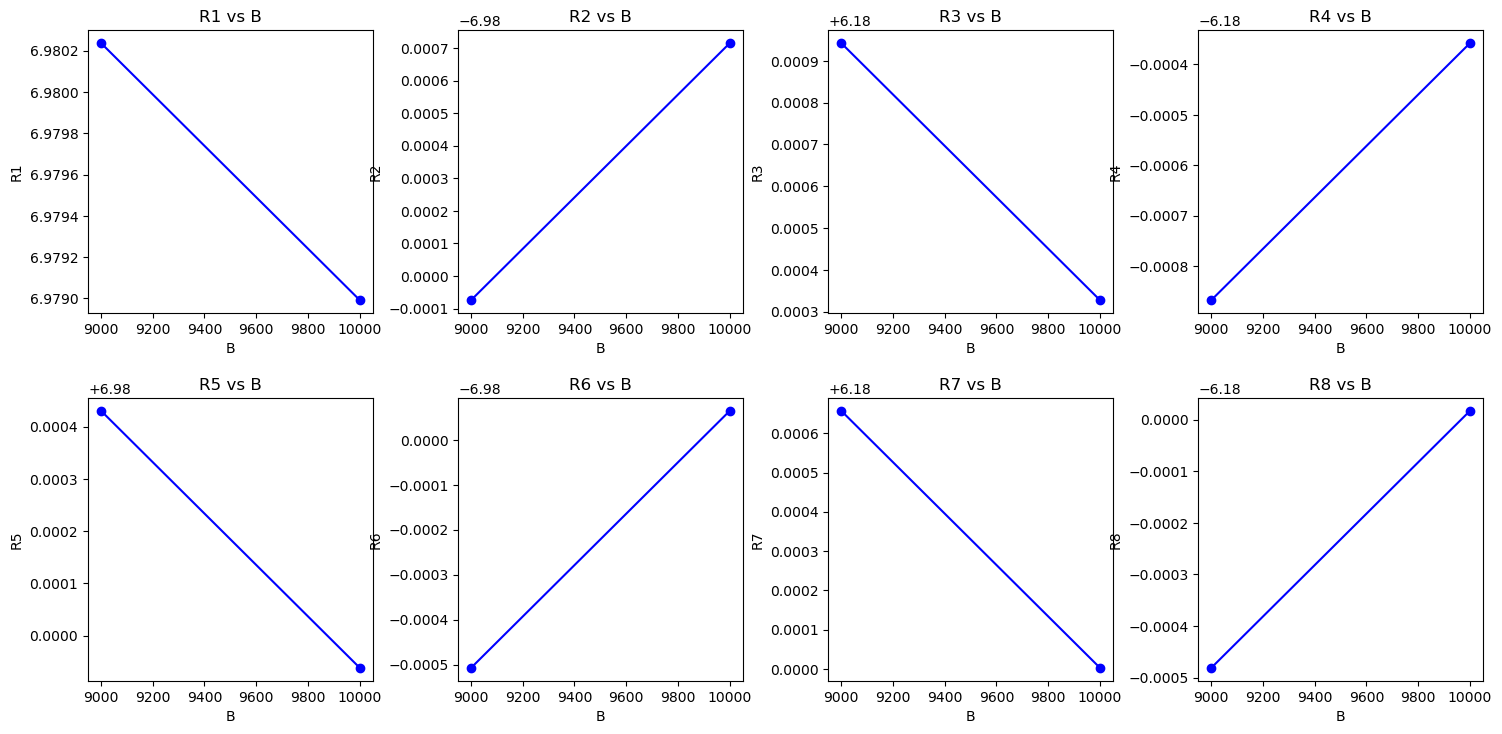

In [9]:
plt.figure(figsize=(18,18))
plt.subplot(4,4,1)
plt.plot(df['B'],df['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')

plt.subplot(4,4,2)
plt.plot(df['B'],df['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')

plt.subplot(4,4,3)
plt.plot(df['B'],df['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(4,4,4)
plt.plot(df['B'],df['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplot(4,4,5)
plt.plot(df['B'],df['R5'], 'bo-')
plt.title('R5 vs B')
plt.ylabel('R5')
plt.xlabel('B')
plt.subplot(4,4,6)
plt.plot(df['B'],df['R6'], 'bo-')
plt.title('R6 vs B')
plt.ylabel('R6')
plt.xlabel('B')
plt.subplot(4,4,7)
plt.plot(df['B'],df['R7'], 'bo-')
plt.title('R7 vs B')
plt.ylabel('R7')
plt.xlabel('B')
plt.subplot(4,4,8)
plt.plot(df['B'],df['R8'], 'bo-')
plt.title('R8 vs B')
plt.ylabel('R8')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

In [10]:
df['Ra'] = (df['R1'] + df['R5'] - df['R2'] - df['R6'])/4
df['Rb'] = (df['R3'] + df['R7'] - df['R4'] - df['R8'])/4
df['R'] = (df['Ra'] + df['Rb'])/2

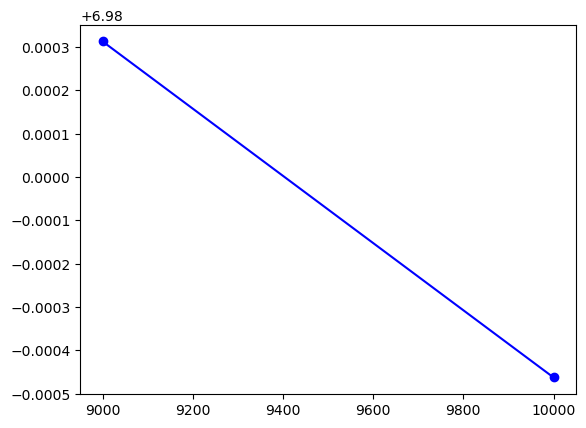

In [11]:
plt.plot(df['B_int'], df['Ra'],'bo-')

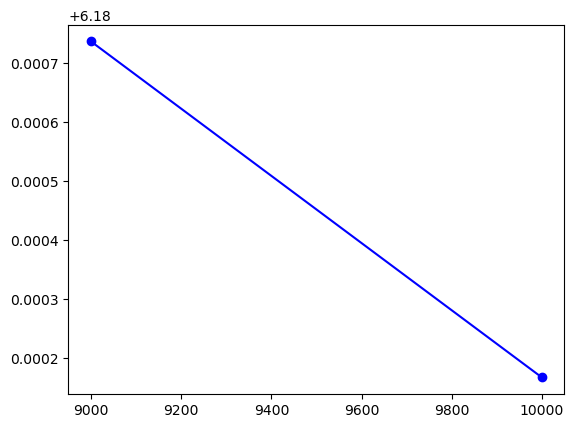

In [12]:
plt.plot(df['B_int'], df['Rb'],'bo-')
plt.show()

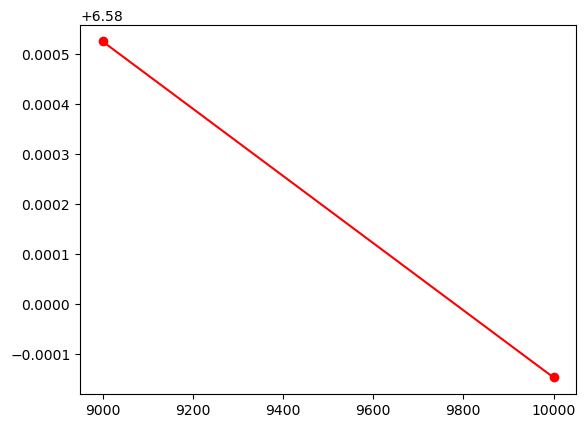

In [13]:
plt.plot(df['B_int'], df['R'], 'ro-')
plt.show()

In [14]:
# df.iloc
# df.loc
R0 = df.loc[df['B_int'] == 0]['R'].mean()
R0

nan

In [15]:
df['MR'] = (df['R'] - R0)/R0*100

In [16]:
df[['B_int','MR']].head()

,B_int,MR
0,10000,NaN
1,9000,NaN


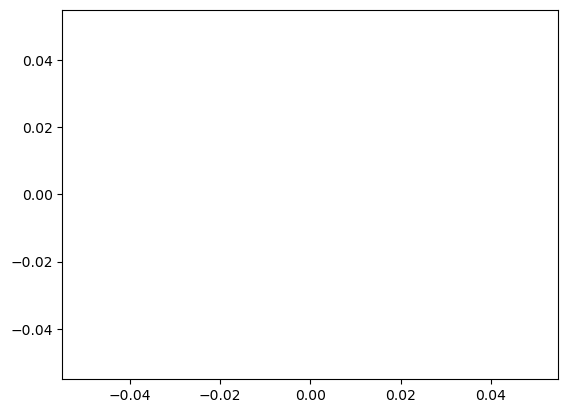

In [17]:
plt.plot(df['B_int'], df['MR'], 'bo-')

In [18]:
df.to_pickle('./pickle_data/MR_300K.pkl')

In [19]:
df['B'] = df['B_int']
df

,I,B,B_int,T,V1,V2,V3,V4,V5,V6,...,R3,R4,R5,R6,R7,R8,Ra,Rb,R,MR
0,0.001,10000,10000,175.013145,6978.991405,-6979.284689,6180.327759,-6180.357369,6979.938442,-6979.934969,...,6.180328,-6.180357,6.979938,-6.979935,6.180003,-6.179983,6.979537,6.180168,6.579853,NaN
1,0.001,9000,9000,175.003528,6980.237772,-6980.074252,6180.942660,-6180.868031,6980.430509,-6980.507452,...,6.180943,-6.180868,6.980431,-6.980507,6.180657,-6.180481,6.980312,6.180737,6.580525,NaN


In [20]:
df['V1'] = (df['V1'] - df['V2'])/2
df['V2'] = (df['V3'] - df['V4'])/2
df['V3'] = (df['V5'] - df['V6'])/2
df['V4'] = (df['V7'] - df['V8'])/2

In [21]:
df = df[['I','B','V1','V2','V3','V4',"multiplier"]].copy()
df

,I,B,V1,V2,V3,V4,multiplier
0,0.001,10000,6979.138047,6180.342564,6979.936705,6179.992727,1000000
1,0.001,9000,6980.156012,6180.905345,6980.468980,6180.569104,1000000


In [22]:
min_B = df['B'].min()
max_B = df['B'].max()
print(min_B, max_B)

9000 10000


In [23]:
B_min_idx = 0
for i in range(len(df)):
    if(df['B'].iloc[i]== min_B): 
        B_min_idx = i
        break

### Creating dec dataset

In [24]:
df_dec = df.iloc[ : B_min_idx+1].copy()
df_inc = df.iloc[B_min_idx+1 : ].copy()

data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1)

data_dec = data_dec[data_dec['B_x'] == -1*data_dec['B_y']] # selecting 

data_dec = data_dec[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_dec.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [25]:
data_dec['V15'] = (data_dec['V1'] + data_dec['V5'])/2
data_dec['V26'] = (data_dec['V2'] + data_dec['V6'])/2
data_dec['V37'] = (data_dec['V3'] + data_dec['V7'])/2
data_dec['V48'] = (data_dec['V4'] + data_dec['V8'])/2

In [26]:
data_dec['Ra'] = (data_dec['V15'] + data_dec['V37'])/(2*data_dec['I']*data_dec['multiplier'])
data_dec['Rb'] = (data_dec['V26'] + data_dec['V48'])/(2*data_dec['I']*data_dec['multiplier'])
data_dec['R'] = (data_dec['Ra'] + data_dec['Rb'])/2

### Creating Increasing Dataset

In [27]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1)

data_inc = data_inc[data_inc['B_x'] == -1*data_inc['B_y']] # selecting 

data_inc = data_inc[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_inc.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [28]:
data_inc['V15'] = (data_inc['V1'] + data_inc['V5'])/2
data_inc['V26'] = (data_inc['V2'] + data_inc['V6'])/2
data_inc['V37'] = (data_inc['V3'] + data_inc['V7'])/2
data_inc['V48'] = (data_inc['V4'] + data_inc['V8'])/2

In [29]:
data_inc['Ra'] = (data_inc['V15'] + data_inc['V37'])/(2*data_inc['I']*data_inc['multiplier'])
data_inc['Rb'] = (data_inc['V26'] + data_inc['V48'])/(2*data_inc['I']*data_inc['multiplier'])
data_inc['R'] = (data_inc['Ra'] + data_inc['Rb'])/2

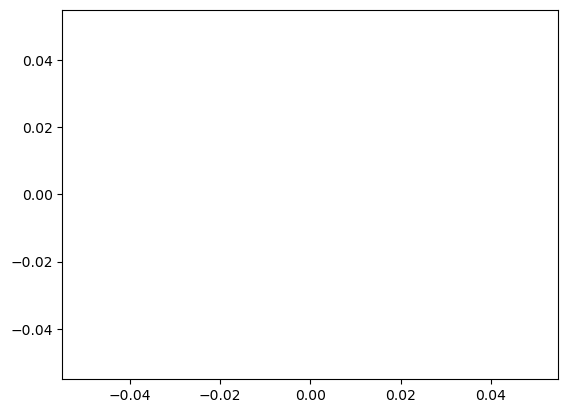

In [30]:

plt.plot(data_dec['B'],data_dec['R'], 'ro-')
plt.plot(data_inc['B'],data_inc['R'], 'ro-')